# Plot Spatial Raster Data in Python.

Customize Plots of Raster Data - Scientists guide to plotting data in python textbook course module
Welcome to the first lesson in the Customize Plots of Raster Data module. When plotting rasters, you often want to overlay two rasters, add a legend, or make the raster interactive. Learn how overlay rasters to create visualizations and how to make interactive plots.
# In This Chapter

    Chapter Four - Customize Raster Plots
    Learning Objectives
    What You Need

# Customize Raster Plots

In this chapter, you will learn how to create and customize raster plots in Python using earthpy, matplotlib, and folium.
Learning Objectives

After completing this chapter, you will be able to:

    Overlay two rasters in Python to create a plot.
    Create interactive map in Jupyter Notebook using the folium package for Python.
    Overlay a raster on an interactive map created with folium.
    Customize a raster map in Python using matplotlib.

What You Need

Be sure you have completed the lesson on Setting Up the Earth Analytics Python Conda Environment..

You need Python and Jupyer Notebook to complete this chapter. You should also have an earth-analytics directory setup on your computer with a data subdirectory within it.

# Layer a raster dataset over a hillshade in Python to create a beautiful basemap that represents topography
# Overlay Rasters in Python

In this lesson, you will learn about overlaying rasters on top of a hillshade for nicer looking plots in Python.

To overlay a raster, you will plot two different raster datasets in the same plot in matplotlib. You will use alpha to adjust the transparency of one of your rasters so the terrain hillshade gives the raster texture!

You will also turn off the legend for the hillshade plot, as the legend we want to see is the DEM elevation values.
What is a Hillshade?

A hillshade is a representation of the earth’s surface as it would look with shade and shadows from the sun. You often render a hillshade using a greyscale colorramp.

Hillshades make nice underlays for other data as they emphasize the topography visually. This adds depth to your map!

To begin, open up both the Digital Terrain Model and the Digital terrain model hillshade files.

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
import earthpy as et
import earthpy.plot as ep

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))


Extracted output to C:\Users\rzouga\earth-analytics\data\colorado-flood\.


In [5]:
# Open raster DTM data
lidar_dem_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", 
                              "lidar", "pre_DTM.tif")

with rio.open(lidar_dem_path) as lidar_dem:
    lidar_dem_im = lidar_dem.read(1, masked=True)

# Open dem hillshade
lidar_hs_path = os.path.join("data", "colorado-flood", "spatial", 
                              "boulder-leehill-rd", "pre-flood", 
                              "lidar", "pre_DTM_hill.tif")

with rio.open(lidar_hs_path) as lidar_dem_hill:
    lidar_dem_hill = lidar_dem_hill.read(1, masked=True)


To plot both layers together, you add a alpha value to the dem image. This value makes the image more transparent. Below an alpha of .5 (50%) is applied. Play around with the alpha value to see how it impacts your map

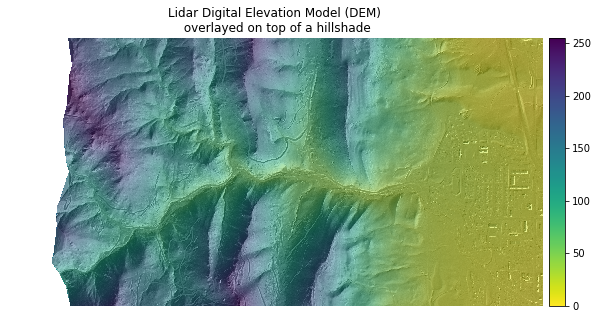

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

ep.plot_bands(lidar_dem_im, ax=ax, cmap='viridis_r',
              title="Lidar Digital Elevation Model (DEM)\n overlayed on top of a hillshade")

ax.imshow(lidar_dem_hill, cmap='Greys', alpha=.5)
ax.set_axis_off()

plt.show()


# Interactive Maps in Python
## Learning Objectives

    Create interactive map in Jupyter Notebook using the Folium package for Python.
    Overlay a raster on an interactive map created with Folium.
    
# Why Use Interactive Maps

Interactive Maps are useful for earth data science because they:

    Clearly convey complex information.
    Are more engaging for viewers than static maps.
    Can be seamlessly integrated into Jupyter Notebooks.

There are two great Python packages for creating interactive maps: folium and mapboxgl. Both of these packages are build on top off the JavaScript library called leaflet.js.

This lesson will focus on folium, which has been around longer than mapboxgl and thus, is well-documented by the Python community.

One major difference between the two packages is that mapboxgl requires a MapBox Access Token. If you are interested in exploring mapboxgl on your own, note that the MapBox Access token is free to use, but does require making an account with MapBox.

You can find more information on the Github page for this package.
# What is an API?

An API (or application programming interface) is an interface that opens a computer-based system to external requests and simplifies certain tasks, such as extracting subsets of data from a large repository or database.

For example, web-based APIs allow you to access data available using web-based interfaces that are separate from the API that you are accessing. Thus, web APIs are a way to avoid the extraneous visual interfaces that you do not need and get the desired data into the tool that you want to use.

Often, you access data from web-based APIs using a URL that contains sets of parameters that specifies the type and particular subset of data that you are interested in. You will learn more about using APIs later in this course.

For this lesson, you simply need to know that the basemaps that you will access to create your interactive maps come from APIs that are provided by various organizations such as OpenStreetMap, MapBox, Stamen, Google, etc.    

In [7]:
# Import necessary packages
import os 
import folium
from folium import plugins
import rasterio as rio
from rasterio.warp import calculate_default_transform, reproject, Resampling
import earthpy as et

# Import data from EarthPy
data = et.data.get_data('colorado-flood')

# Set working directory to earth-analytics
os.chdir(os.path.join(et.io.HOME, 'earth-analytics'))



# Simple Basemap

You can make an interactive map with folium using just one line of code!

You can use the Map() function from folium and providing a latitude and longitude to center the map. The map is created using the default basemap from OpenStreetMap.

In [8]:
# Create a map using the Map() function and the coordinates for Boulder, CO
m = folium.Map(location=[40.0150, -105.2705])

# Display the map
m


# Change Basemap

You can change the basemap for the map by providing a value for the tiles parameter of the Map() function.

There are many different options including Stamen Terrain, Stamen Toner and cartodbpositron. More details and basemaps names available on the Folium Documentation for the Map() function.

In [12]:
# Create a map using Stamen Terrain as the basemap
m = folium.Map(location=[40.0150, -105.2705],
              tiles = 'Stamen Terrain')

# Display map
m


# Add Markers

You can also add markers to label specific points on top of a folium basemap, such as the coordinates that are being used to center the map. You can even add a pop-up label for the marker that is activated when you click on it.

In [13]:
# Create a map using Stamen Terrain, centered on Boulder, CO
m = folium.Map(location=[40.0150, -105.2705], 
              tiles = 'Stamen Terrain')

# Add marker for Boulder, CO
folium.Marker(
    location=[40.009515, -105.242714], # coordinates for the marker (Earth Lab at CU Boulder)
    popup='Earth Lab at CU Boulder', # pop-up label for the marker
    icon=folium.Icon()
).add_to(m)

# Display m
m


# Raster Overlay on Interactive Map

You can also overlay rasters on folium basemaps.

The default coordinate system and projection for web-based basemaps is WGS84 Web Mercator. To overlay data on web-based basemaps, the overlay data needs to be in the WGS84 coordinate system (see this link for more information on this coordinate system).

Thus, to overlay a raster on a basemap, you first need to project the raster to WGS84 (EPSG 4326).
Project Raster

You can use the rasterio package, which you imported as rio, to project a raster. In this example, you will use a raster for a post-flood digital terrain model (DTM) in the Northwest Boulder area: post_DTM.tif.

In [14]:
# Create variables for destination coordinate system and the name of the projected raster
dst_crs = 'EPSG:4326' 

in_path = os.path.join("data", "colorado-flood", "spatial", 
                        "boulder-leehill-rd", "post-flood", 
                        "lidar", "post_DTM.tif")

out_path = os.path.join("data", "colorado-flood", "spatial", 
                        "boulder-leehill-rd", "outputs", 
                        "reproj_post_DTM.tif")


# Use rasterio package as rio to open and project the raster
with rio.open(in_path) as src:
    transform, width, height = calculate_default_transform(
        src.crs, dst_crs, src.width, src.height, *src.bounds)
    kwargs = src.meta.copy()
    kwargs.update({
        'crs': dst_crs,
        'transform': transform,
        'width': width,
        'height': height
    })
 

    # Use rasterio package as rio to write out the new projected raster
    # Code uses loop to account for multi-band rasters
    with rio.open(out_path, 'w', **kwargs) as dst:
        for i in range(1, src.count + 1):
            reproject(
            source=rio.band(src, i),
            destination=rio.band(dst, i),
            src_transform=src.transform,
            src_crs=src.crs,
            dst_transform=transform,
            dst_crs=dst_crs,
            resampling=Resampling.nearest)    

# Use rasterio to import the reprojected data as img
with rio.open(out_path) as src:
    boundary = src.bounds
    img = src.read()
    nodata = src.nodata


# Overlay Raster

Now that the raster is in the correct coordinate system (WGS84), you can overlay it on the basemp using the add_child() function and specifying the image (e.g. img) and setting an opacity and bounding box, if desired.

In [15]:
# Create a map using Stamen Terrain, centered on study area with set zoom level
m = folium.Map(location=[40.06, -105.30],
                   tiles='Stamen Terrain', zoom_start = 13)

# Overlay raster called img using add_child() function (opacity and bounding box set)
m.add_child(folium.raster_layers.ImageOverlay(img[0], opacity=.7, 
                                 bounds =[[40.05577828237005, -105.32837712340124], [40.073923431943214, -105.28139535136515]]))

# Display map
m
